# 2. 멋진 단어사전 만들기

## 라이브러리 버전을 확인해 봅니다

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import konlpy

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)
print(np.__version__)
print(konlpy.__version__)

2.6.0
1.21.4
0.5.2


## Step 1. 데이터 전처리

In [2]:
data = pd.read_table('~/aiffel/GD/ratings.txt')
data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [3]:
print('데이터 개수 : ', len(data))

데이터 개수 :  200000


### 1.2 결측치 제거

In [4]:
orig_len = len(data)
orig_len

200000

In [5]:
data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [6]:
data_dropna = data.dropna(axis = 0)

print('결측치 제거 후 데이터 개수 : ', len(data_dropna))

결측치 제거 후 데이터 개수 :  199992


### 1.3 중복 제거

In [7]:
cleaned_corpus = data_dropna.drop_duplicates(['document'])

print('중복 제거 후 데이터 개수 : ', len(cleaned_corpus))

중복 제거 후 데이터 개수 :  194543


In [8]:
print('전처리 전 데이터 개수 : ', len(data))
print('결측치 제거 후 데이터 개수 : ', len(data_dropna))
print('중복 제거 후 데이터 개수 : ', len(cleaned_corpus))

전처리 전 데이터 개수 :  200000
결측치 제거 후 데이터 개수 :  199992
중복 제거 후 데이터 개수 :  194543


## Step 2. 데이터 분석

In [9]:
review = cleaned_corpus['document']

In [10]:
new_review = []

for i in review:
    new_review.append(len(i))

In [11]:
cleaned_corpus['corpus_length'] = new_review
cleaned_corpus

,id,document,label,corpus_length
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,19
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1,137
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,36
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1,54
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,27
...,...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0,14
199996,3302770,쓰.레.기,0,5
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0,33
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0,35


### 2.1 문장 길이 확인

문장의 최단 길이: 1
문장의 최장 길이: 142
문장의 평균 길이: 36


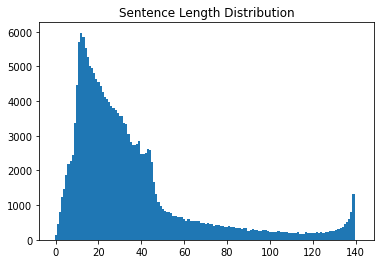

In [12]:
min_len = 999
max_len = 0
sum_len = 0

for sen in review:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(review))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in review:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

#### 2.1.1 길이가 1인 문장

In [13]:
def check_sentence_with_length(review, length):
    count = 0
    
    for sen in review:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [14]:
check_sentence_with_length(review, 1)

굿
핡
휴
시
ㅋ
ㅇ
‥
O
갑
ㅎ
.
올
헷
g
♥
짱
ㅆ
굳
잼
ㅁ
?
애
흠
!
찜
b
,
1
9
♬
ㅗ
ㄳ
ㄴ
호
a
d
f
음
헐
캬
린
업
乃
ㅠ
;
·
k
움
ㄱ
쩜
-
군
ㅉ
훗
z
쨩
뿌
♡
하
h
ㅍ
꽉
토
귯
아
오
ㅣ
봐
웅
네
ㅂ
꿈
헉
와
뻑
걍
헝
우
즛
풉
4
쀍
ㄹ
삼
쒯
즐
함
0
진
악
풋
쩝
욜
ㄷ
흐
싫
ㅜ
잏
허
엿
쉣


#### 2.1.2 길이가 긴 문장

In [15]:
check_sentence_with_length(review, 142)

영화 초반을 보면서 ' 좀 허항된 . 황당한 코믹스런 ' 연출이 되겠다란 생각을 하고 보기시작했는데 .. 연주가 처음 시작되는 부분에서 저도 모르게 눈가가 초촉해 지기시작하더군요 .. 이유는 모르겠네요 ... 자유에 대한 갈증과 박해에 대한 내용을 &gt


In [16]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 140 이상인 문장 길이를 추출합니다.
    if _sum >= 140:
        print("Outlier Index:", idx+1)

Outlier Index: 2
Outlier Index: 3
Outlier Index: 4
Outlier Index: 5
Outlier Index: 6
Outlier Index: 7
Outlier Index: 8
Outlier Index: 9
Outlier Index: 10
Outlier Index: 11
Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15
Outlier Index: 16
Outlier Index: 17
Outlier Index: 18
Outlier Index: 19
Outlier Index: 20
Outlier Index: 21
Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28
Outlier Index: 29
Outlier Index: 30
Outlier Index: 31
Outlier Index: 32
Outlier Index: 33
Outlier Index: 34
Outlier Index: 35
Outlier Index: 36
Outlier Index: 37
Outlier Index: 38
Outlier Index: 39
Outlier Index: 40
Outlier Index: 41
Outlier Index: 42
Outlier Index: 43
Outlier Index: 44
Outlier Index: 45
Outlier Index: 46
Outlier Index: 47
Outlier Index: 48
Outlier Index: 49
Outlier Index: 50
Outlier Index: 51
Outlier Index: 52
Outlier Index: 53
Outlier Index: 54
Outlier Index: 55
Outlier Index: 56
Outlier Index: 57


In [17]:
sentence_length

array([ 124,  460,  793, 1222, 1469, 1882, 2187, 2270, 2440, 3379, 4459,
       5711, 5970, 5848, 5518, 5265, 5005, 4947, 4806, 4626, 4542, 4436,
       4264, 4129, 4073, 3973, 3865, 3809, 3743, 3665, 3561, 3566, 3353,
       3339, 3036, 2831, 2736, 2736, 2775, 2856, 2486, 2486, 2495, 2625,
       2599, 2257, 1660, 1311, 1079,  968,  893,  844,  799,  789,  765,
        678,  686,  654,  658,  648,  614,  554,  600,  555,  544,  554,
        528,  528,  473,  493,  443,  477,  469,  443,  403,  437,  422,
        388,  398,  365,  372,  398,  380,  381,  326,  350,  327,  308,
        333,  332,  260,  286,  300,  281,  291,  255,  261,  271,  283,
        246,  231,  233,  223,  224,  244,  221,  223,  216,  211,  198,
        185,  206,  199,  215,  177,  178,  178,  219,  198,  199,  195,
        183,  221,  192,  226,  194,  218,  218,  247,  245,  252,  276,
        304,  350,  380,  452,  514,  589,  802, 1328,    0,    1])

### 2.2 최장 길이(max_len) 정하기

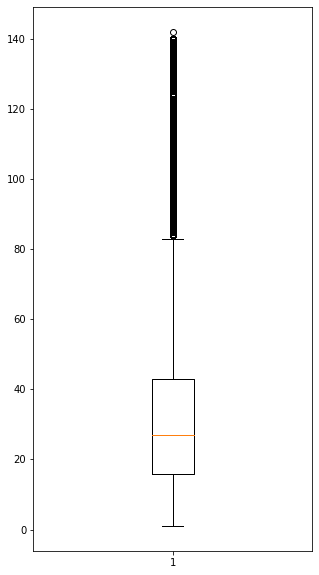

In [18]:
text_len = [len(sen) for sen in review]

plt.figure(figsize = (5,10))
plt.boxplot(text_len)
plt.show()

###### 사분위수 정의 https://sosomemo.tistory.com/34

In [19]:
num = pd.Series(text_len)

Q1 = num.quantile(.25)
Q2 = num.quantile(.5)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
MAX = Q3 + (1.5 * IQR)

print('Q1 = ', Q1)  # 제 1사분위수
print('Q2 = ', Q2)  # 중위수
print('Q3 = ', Q3)   #제 3사분위수
print('IQR = ', IQR)  # 사분위간 범위
print('MAX = ', MAX)  # 최댓값

Q1 =  16.0
Q2 =  27.0
Q3 =  43.0
IQR =  27.0
MAX =  83.5


In [20]:
# below_threshold_len : 데이터의 몇 %가 최대 길이 안에 들어오는지 계산하는 함수

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
print('=3')

=3


In [21]:
below_threshold_len(max_len, review)
below_threshold_len(83, review)   # 최댓값 
below_threshold_len(60, review)  
below_threshold_len(43, review)   # 제 3사분위수

전체 샘플 중 길이가 142 이하인 샘플의 비율: 100.0
전체 샘플 중 길이가 83 이하인 샘플의 비율: 91.43839665266805
전체 샘플 중 길이가 60 이하인 샘플의 비율: 85.86739178484962
전체 샘플 중 길이가 43 이하인 샘플의 비율: 75.63160843618121


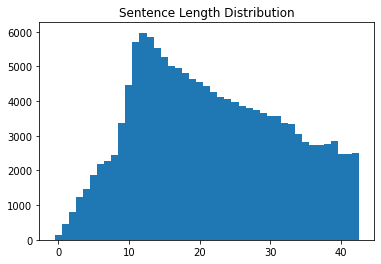

In [22]:
max_len = 43

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in review if len(s) <= max_len]

removed_data = cleaned_corpus[cleaned_corpus['corpus_length']<= max_len]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [23]:
removed_data

,id,document,label,corpus_length
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1,19
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1,36
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1,27
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1,29
6,9279041,완전 감동입니다 다시봐도 감동,1,16
...,...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0,14
199996,3302770,쓰.레.기,0,5
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0,33
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0,35


In [24]:
sentence_length

array([ 124,  460,  793, 1222, 1469, 1882, 2187, 2270, 2440, 3379, 4459,
       5711, 5970, 5848, 5518, 5265, 5005, 4947, 4806, 4626, 4542, 4436,
       4264, 4129, 4073, 3973, 3865, 3809, 3743, 3665, 3561, 3566, 3353,
       3339, 3036, 2831, 2736, 2736, 2775, 2856, 2486, 2486, 2495])

In [25]:
print('전처리 전 데이터 개수 : ', len(data))
print('결측치 제거 후 데이터 개수 : ', len(data_dropna))
print('중복 제거 후 데이터 개수 : ', len(cleaned_corpus))
print('maxlen 설정 후 데이터 개수 : ', len(removed_data))
print('최종 데이터 양(%) : ', (len(removed_data) / len(data) * 100))

전처리 전 데이터 개수 :  200000
결측치 제거 후 데이터 개수 :  199992
중복 제거 후 데이터 개수 :  194543
maxlen 설정 후 데이터 개수 :  147136
최종 데이터 양(%) :  73.568


## Step 3. SentencePiece 모델 학습

In [26]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in removed_data['document']:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 375259 Sep 23 03:04 korean_spm.model
-rw-r--r-- 1 root root 144741 Sep 23 03:04 korean_spm.vocab


In [27]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1616, 10, 409, 16, 1586, 10, 160, 13, 4]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## Step 4. Tokenizer 함수 작성

In [28]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [29]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)
print(word_index)
print(index_word)

[[ 476 3136   15 1092 3057    4    0    0    0    0]
 [1539 2140  219  540   10    3   18 7910  814    7]]
{0: '<unk>', 1: '<s>', 2: '</s>', 3: '▁', 4: '.', 5: '..', 6: '▁영화', 7: '...', 8: '이', 9: '의', 10: '가', 11: '도', 12: '는', 13: '다', 14: ',', 15: '을', 16: '에', 17: '은', 18: '고', 19: '?', 20: '지', 21: '!', 22: '▁너무', 23: '한', 24: '▁정말', 25: '만', 26: '~', 27: '를', 28: '▁진짜', 29: '영화', 30: '▁이', 31: '로', 32: '나', 33: '게', 34: '어', 35: '라', 36: '네', 37: '점', 38: '리', 39: '아', 40: '!!', 41: '기', 42: '과', 43: '....', 44: '인', 45: '▁1', 46: '요', 47: '▁아', 48: '▁왜', 49: '서', 50: '▁잘', 51: '▁안', 52: '으로', 53: '▁이런', 54: '하고', 55: '자', 56: '해', 57: '들', 58: '▁그', 59: '와', 60: '▁더', 61: '▁그냥', 62: '에서', 63: '거', 64: '▁10', 65: '네요', 66: '▁수', 67: '▁다', 68: '스', 69: '▁본', 70: '▁드라마', 71: '음', 72: '하는', 73: '▁최고', 74: '야', 75: '▁최고의', 76: '▁평점', 77: '▁ᄏᄏ', 78: '대', 79: '하', 80: '▁이거', 81: '니', 82: '함', 83: '면', 84: '▁완전', 85: '시', 86: '▁쓰레기', 87: '이다', 88: '▁보고', 89: '하다', 90: '수', 91: '▁내', 92:

## Step 5. 모델 학습

### 5.1 데이터 분리

In [30]:
tensor, word_index, index_word = sp_tokenize(s, removed_data['document'])

In [31]:
tensor

array([[1183,  174,  281, ...,    0,    0,    0],
       [3102, 1838,  583, ...,    0,    0,    0],
       [  51,  175,  331, ...,    0,    0,    0],
       ...,
       [  84, 5122,   29, ...,    0,    0,    0],
       [  48,  343, 4997, ...,    0,    0,    0],
       [1414, 1611,  395, ...,    0,    0,    0]], dtype=int32)

In [32]:
len(tensor)

147136

In [33]:
removed_label = np.array(removed_data['label'])

In [35]:
removed_label

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(tensor, removed_label, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

In [37]:
print('train 데이터 개수 : ', len(x_train))
print('val 데이터 개수 : ', len(x_val))
print('test 데이터 개수 : ', len(x_test))
print('리뷰 데이터 총 개수 : ', len(x_train)+len(x_val)+len(x_test))

print('---------------------')

print('train label 데이터 개수 : ', len(y_train))
print('val label 데이터 개수 : ', len(y_val))
print('test label 데이터 개수 : ', len(y_test))
print('라벨 데이터 총 개수 : ', len(y_train)+len(y_val)+len(y_test))

train 데이터 개수 :  94166
val 데이터 개수 :  29428
test 데이터 개수 :  23542
리뷰 데이터 총 개수 :  147136
---------------------
train label 데이터 개수 :  94166
val label 데이터 개수 :  29428
test label 데이터 개수 :  23542
라벨 데이터 총 개수 :  147136


### 5.2 모델 구성 및 훈련 (RNN 모델)


In [38]:
vocab_size = 10000   # 단어사진 크기
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경 가능한 하이퍼파라마터)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
model.add(tf.keras.layers.LSTM(8))  # LSTM 레이어 사용 & LSTM 벡터의 차원 수 변경 가능
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력은 긍정/부정을 나타내는 1dim

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 10

history = model.fit(x_train,
                    y_train,
                    epochs = epochs,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose = 1)

Epoch 1/10
184/184 [==============================] - 29s 8ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6924 - val_accuracy: 0.5014
Epoch 2/10
184/184 [==============================] - 1s 6ms/step - loss: 0.4602 - accuracy: 0.7888 - val_loss: 0.3719 - val_accuracy: 0.8373
Epoch 3/10
184/184 [==============================] - 1s 6ms/step - loss: 0.3375 - accuracy: 0.8558 - val_loss: 0.3577 - val_accuracy: 0.8415
Epoch 4/10
184/184 [==============================] - 1s 6ms/step - loss: 0.3189 - accuracy: 0.8641 - val_loss: 0.3587 - val_accuracy: 0.8411
Epoch 5/10
184/184 [==============================] - 1s 6ms/step - loss: 0.3102 - accuracy: 0.8676 - val_loss: 0.3657 - val_accuracy: 0.8402
Epoch 6/10
184/184 [==============================] - 1s 6ms/step - loss: 0.3042 - accuracy: 0.8707 - val_loss: 0.3580 - val_accuracy: 0.8429
Epoch 7/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2996 - accuracy: 0.8729 - val_loss: 0.3589 - val_accuracy: 0.8408
Epoch

In [40]:
results = model.evaluate(x_test, y_test, verbose = 2)
print(results)

736/736 - 2s - loss: 0.3692 - accuracy: 0.8450
[0.3691580891609192, 0.8449579477310181]


In [41]:
history_dict = history.history

print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


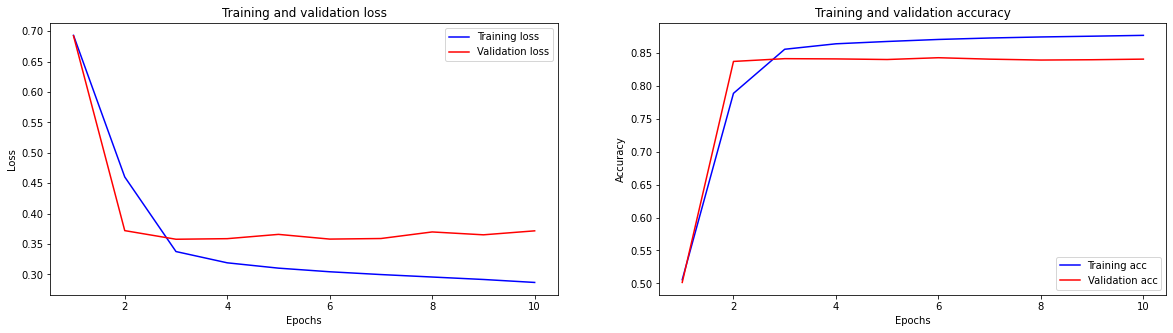

In [42]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Step 6. SentencePiece model 변경 (bpe)

### 6.1 SentencePiece 모델 학습

In [43]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in removed_data['document']:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_bpe --model_type=bpe --vocab_size={}'.format(temp_file, vocab_size)    
)

!ls -l korean_spm_bpe*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm_bpe --model_type=bpe --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm_bpe
  model_type: BPE
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_

-rw-r--r-- 1 root root 370456 Sep 23 03:10 korean_spm_bpe.model
-rw-r--r-- 1 root root 115658 Sep 23 03:10 korean_spm_bpe.vocab


In [44]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm_bpe.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[6062, 995, 6535, 6252, 1604, 6245, 6357, 6238, 6236]
['▁아버', '지가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### 6.2 Tokenizer 함수


In [45]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm_bpe.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [46]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[ 646 2980 6267  559  844 6236    0    0    0]
 [1680 2218  272  364 6245  172 7699   17    7]]


### 6.3 모델 구성 및 훈련


In [47]:
vocab_size = 10000   # 단어사진 크기
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경 가능한 하이퍼파라마터)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
model_2.add(tf.keras.layers.LSTM(8))  # LSTM 레이어 사용 & LSTM 벡터의 차원 수 변경 가능
model_2.add(tf.keras.layers.Dense(8, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력은 긍정/부정을 나타내는 1dim

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [48]:
model_2.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

epochs = 10

history_2 = model.fit(x_train,
                      y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 1)

Epoch 1/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2814 - accuracy: 0.8787 - val_loss: 0.3643 - val_accuracy: 0.8404
Epoch 2/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2755 - accuracy: 0.8806 - val_loss: 0.3750 - val_accuracy: 0.8408
Epoch 3/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2676 - accuracy: 0.8819 - val_loss: 0.3692 - val_accuracy: 0.8428
Epoch 4/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2570 - accuracy: 0.8842 - val_loss: 0.3930 - val_accuracy: 0.8387
Epoch 5/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2468 - accuracy: 0.8857 - val_loss: 0.3924 - val_accuracy: 0.8404
Epoch 6/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2365 - accuracy: 0.8889 - val_loss: 0.4111 - val_accuracy: 0.8381
Epoch 7/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2276 - accuracy: 0.8919 - val_loss: 0.4407 - val_accuracy: 0.8358
Epoch 

In [49]:
results_2 = model_2.evaluate(x_test, y_test, verbose = 2)
print(results_2)

736/736 - 2s - loss: 0.6932 - accuracy: 0.4992
[0.6931526064872742, 0.4992354214191437]


In [50]:
history_2_dict = history_2.history

print(history_2_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


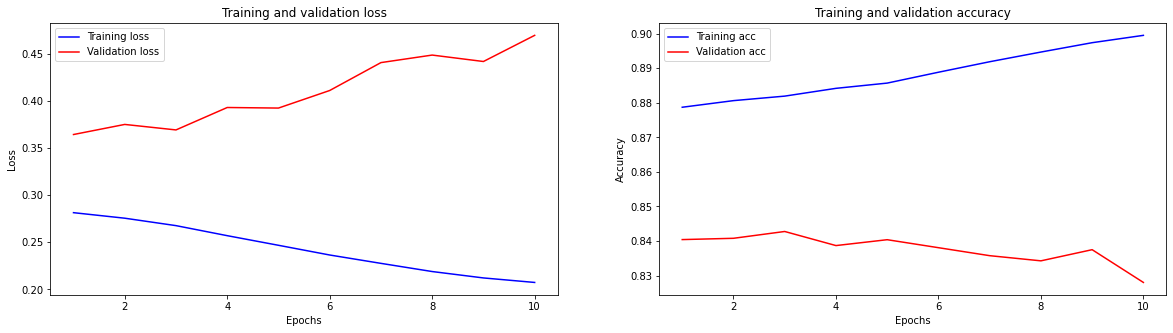

In [51]:
acc = history_2_dict['accuracy']
val_acc = history_2_dict['val_accuracy']

loss = history_2_dict['loss']
val_loss = history_2_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Step 7. vocab_size 조정
## 7.1 SentencePiece(unigram)

In [52]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 25000

with open(temp_file, 'w') as f:
    for row in removed_data['document']:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm_25000 --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm_25000*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm_25000 --vocab_size=25000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm_25000
  model_type: UNIGRAM
  vocab_size: 25000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_voc

-rw-r--r-- 1 root root 721295 Sep 23 03:13 korean_spm_25000.model
-rw-r--r-- 1 root root 505806 Sep 23 03:13 korean_spm_25000.vocab


In [53]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm_25000.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[8236, 641, 19, 1639, 11, 277, 21, 3]
['▁아버지가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [54]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm_25000.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [55]:
vocab_size = 10000   # 단어사진 크기
word_vector_dim = 16  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경 가능한 하이퍼파라마터)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None,)))
model_3.add(tf.keras.layers.LSTM(8))  # LSTM 레이어 사용 & LSTM 벡터의 차원 수 변경 가능
model_3.add(tf.keras.layers.Dense(8, activation = 'relu'))
model_3.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # 최종 출력은 긍정/부정을 나타내는 1dim

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_3.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

epochs = 10

history_3 = model.fit(x_train,
                      y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 1)

Epoch 1/10
184/184 [==============================] - 1s 6ms/step - loss: 0.2003 - accuracy: 0.9016 - val_loss: 0.4817 - val_accuracy: 0.8332
Epoch 2/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1965 - accuracy: 0.9030 - val_loss: 0.4841 - val_accuracy: 0.8325
Epoch 3/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1915 - accuracy: 0.9056 - val_loss: 0.5085 - val_accuracy: 0.8278
Epoch 4/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1887 - accuracy: 0.9069 - val_loss: 0.5172 - val_accuracy: 0.8305
Epoch 5/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1844 - accuracy: 0.9085 - val_loss: 0.5273 - val_accuracy: 0.8238
Epoch 6/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1818 - accuracy: 0.9099 - val_loss: 0.5095 - val_accuracy: 0.8282
Epoch 7/10
184/184 [==============================] - 1s 6ms/step - loss: 0.1814 - accuracy: 0.9101 - val_loss: 0.5308 - val_accuracy: 0.8322
Epoch 

In [57]:
results_3 = model_3.evaluate(x_test, y_test, verbose = 2)
print(results_3)

736/736 - 2s - loss: 0.6932 - accuracy: 0.4992
[0.6932483911514282, 0.4992354214191437]


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm_bpe_25000 --model_type=bpe --vocab_size=25000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm_bpe_25000
  model_type: BPE
  vocab_size: 25000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_l

KeyboardInterrupt: 